<a href="https://colab.research.google.com/github/Minu-kr/2021_Dacon_exercise/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#데이터 확인
df_train = pd.read_csv('./train.csv')

In [3]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#학습 데이터 줄 수 조회
len(df_train)

891

In [5]:
#각 컬럼의 널값의 수 조회
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [6]:
#각 컬럼의 널 값의 비율 조회
df_train.isnull().sum()/len(df_train)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Survived       0.000000
dtype: float64

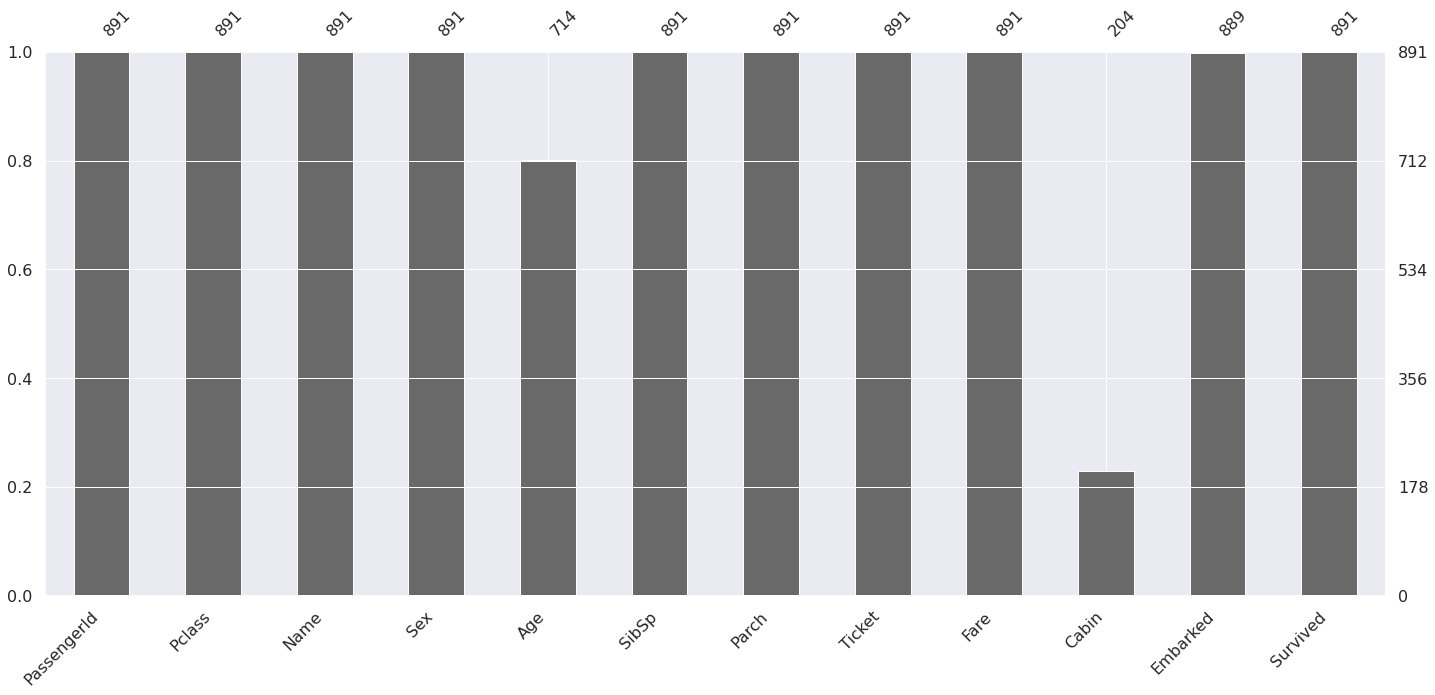

In [7]:
import missingno as msno
#msno.bar는 각 컬럼의 null 이 아닌 데이터의 비율을 그래프로 그려주는 패키지
msno.bar(df=df_train)

In [10]:
#Serviced 컬럼에 저장된 값들의 빈도수 조회
#0 사망자 549명
#1 생존자 342명
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
#티켓 클래스의 빈도수 조회
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
#각 줄이 생존자 Survived==1 인지 여부 조회
#존건 만족하면 True 아니면 False 리턴
df_train['Survived']==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [13]:
#생존자 Survived=1 인 줄 의 데이터 조회

df_train[df_train['Survived']==1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
880,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


In [14]:
#생존자 Survived=1 인 줄 의 PClass  칸 조회
df_train[df_train['Survived']==1]["Pclass"]

1      1
2      3
3      1
8      3
9      2
      ..
875    3
879    1
880    2
887    1
889    1
Name: Pclass, Length: 342, dtype: int64

In [15]:
#생존자 Survived=1 인 줄 의 PClass  칸의 빈도 조회
df_train[df_train['Survived']==1]["Pclass"].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [16]:
#Pclass칸과 Survived칸을 교차해서 빈도수를 출력
pd.crosstab(df_train['Pclass'], df_train['Survived'] ,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
#Sex 과 Survived칸을 교차해서 빈도수를 출력
pd.crosstab(df_train['Sex'], df_train['Survived'] ,margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


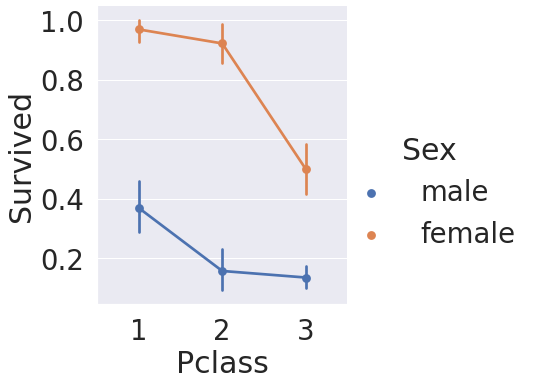

In [18]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

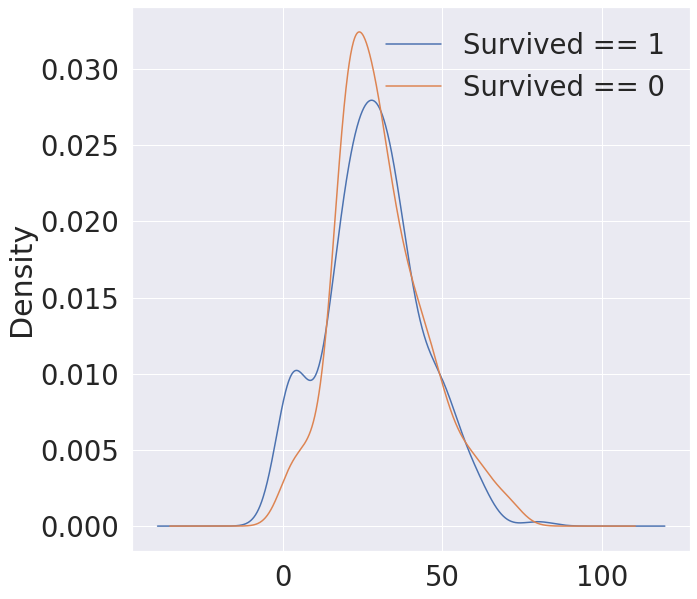

In [19]:
plt.figure(figsize=(10, 10))
df_train['Age'][df_train['Survived'] == 1].plot(kind='kde')
df_train['Age'][df_train['Survived'] == 0].plot(kind='kde')
plt.legend(['Survived == 1', 'Survived == 0'])

In [20]:
pd.crosstab(df_train['Embarked'], df_train['Survived'] ,margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [21]:
pd.crosstab(df_train['Embarked'], df_train['Pclass'] ,margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


In [22]:
df_train.corr()["Survived"]

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [23]:
#각 컬럼의 기울어 짐 정도 조회
df_train.skew()

PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Survived       0.478523
dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

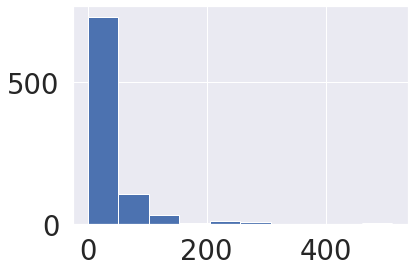

In [24]:
#가장 기울어진 컬럼 시각화
plt.hist(df_train["Fare"])

In [25]:
#Fare에 log(1+데이터) 를 곱한 값을 리턴하는 np.log1p 호출
#Fare컬럼에 대입
df_train["Fare"]=np.log1p(df_train["Fare"])

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

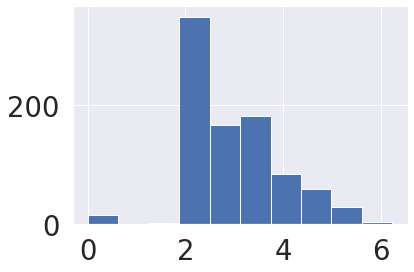

In [26]:
plt.hist(df_train["Fare"])

In [27]:
#배우자 수와 부모 아이수를 합해서 FamilySize컬럼 생성
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [28]:
pd.crosstab(df_train['FamilySize'], df_train['Survived'], margins=True)

Survived,0,1,All
FamilySize,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


In [29]:
#name 컬럼을 리스트로 변환해서 name_list에 대입
name_list=df_train["Name"].tolist() 
name_list

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [30]:
import re
#다음 단어중 하나를 포함하는 문자열을 찾기 위한 객체 p 생성
p = re.compile("Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mme|Countess|Lady|Don|Countess")

In [31]:
for name in name_list:
    #p에 대입된 문자열과 name일치하는 문자열을 리턴받아서 출력
    #일치하는 문자열이 name에 일치하는 문자열이 없으면 에러 발생
    print(p.search(name)[0])        

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Dr
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Dr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr


TypeError: ignored

In [32]:
for name in name_list:
    #일치하는 문자열이 존재 할때는 p.search가 None이 아님
    if p.search(name)!=None:
        print(p.search(name)[0]) #문자열 출력
    else:
        print("Other") #일치하는 문자열이 없을때 Other 출력

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Dr
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Dr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Other
Other
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Other
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
M

In [33]:
sir = []
for name in name_list:
    if p.search(name)!=None:
        #검색한 문자열이 'Countess',"Lady"," Mrs" 중 하나를 포함
        if p.search(name)[0] in ['Countess',"Lady","Mrs"]:
            sir.append("Mrs")
        elif p.search(name)[0] in ["Mme","Ms","Mlle"]: #검색한 문자열이 '"Mme","Ms","Mlle" 중 하나를 포함
            sir.append("Miss") 
        elif p.search(name)[0] in ["Don","Dr","Major"]: #검색한  문자열이 '"Don","Dr","Major"중 하나를 포함
            sir.append("Mr")
        else:
            sir.append(p.search(name)[0])
    else:
        sir.append("Other")

In [34]:
sir

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr

In [35]:
#sir을 포함하는 데이터프레임 칸 (Series) 생성
pd.Series(sir)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Length: 891, dtype: object

In [36]:
pd.Series(sir).value_counts()

Mr        530
Miss      185
Mrs       126
Master     40
Other      10
dtype: int64

In [37]:
#sir을 포함하는 데이터프레임 칸 (Series) 생성
#df_train에 Sir이라는 칸이름으로 추가
df_train["Sir"]=pd.Series(sir)
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,Sir
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,0,2,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,1,2,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,1,2,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,0,1,Mr


In [39]:
pd.crosstab(df_train['Sir'], df_train['Survived'] ,margins=True)

Survived,0,1,All
Sir,,,
Master,17,23,40
Miss,55,130,185
Mr,442,88,530
Mrs,26,100,126
Other,9,1,10
All,549,342,891


In [40]:
#Sir컬럼을 기준으로 평균 계산
df_train.groupby('Sir').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,FamilySize
Sir,,,,,,,,
Master,414.975000,2.625000,4.574167,2.300000,1.375000,3.381361,0.575000,4.675000
Miss,413.708108,2.281081,21.860000,0.702703,0.540541,3.192351,0.702703,2.243243
Mr,454.490566,2.384906,32.651589,0.292453,0.150943,2.728141,0.166038,1.443396
Mrs,456.706349,1.984127,36.000000,0.690476,0.817460,3.485083,0.793651,2.507937
Other,582.600000,1.600000,48.300000,0.200000,0.200000,2.848635,0.100000,1.400000


In [41]:
#Sir컬럼 기준으로 평균중 "Age" 컬럼의 평균 계산
df_train.groupby('Sir').mean()["Age"]

Sir
Master     4.574167
Miss      21.860000
Mr        32.651589
Mrs       36.000000
Other     48.300000
Name: Age, dtype: float64

In [42]:
#Sir컬럼의 값이 "Mrs" 의 평균
df_train.groupby('Sir').mean().loc["Mrs"]

PassengerId    456.706349
Pclass           1.984127
Age             36.000000
SibSp            0.690476
Parch            0.817460
Fare             3.485083
Survived         0.793651
FamilySize       2.507937
Name: Mrs, dtype: float64

In [43]:
#Sir컬럼의 값이 "Mrs" 의 나이 평균
df_train.groupby('Sir').mean().loc["Mrs"]["Age"]

36.0

In [44]:
sir_df=df_train.groupby('Sir').mean()

In [45]:
sir_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,FamilySize
Sir,,,,,,,,
Master,414.975000,2.625000,4.574167,2.300000,1.375000,3.381361,0.575000,4.675000
Miss,413.708108,2.281081,21.860000,0.702703,0.540541,3.192351,0.702703,2.243243
Mr,454.490566,2.384906,32.651589,0.292453,0.150943,2.728141,0.166038,1.443396
Mrs,456.706349,1.984127,36.000000,0.690476,0.817460,3.485083,0.793651,2.507937
Other,582.600000,1.600000,48.300000,0.200000,0.200000,2.848635,0.100000,1.400000


In [46]:
#Age컬럼이 null인 줄의 인덱스:index
#df_train: df
def process_age_null(index,df):
    #index에 해당하는 줄의 "Sir" 칸의 데이터를 row_sir에 대입
    row_sir=df.loc[index]["Sir"]
    print("index:",index,"row_sir:",row_sir)
    #sir_df에서 row_sir의 나이의 평균을 sir_mean에 대입
    sir_mean=sir_df.loc[row_sir]["Age"]
    print("sir_mean:",sir_mean)
    #sir_mean을 index번째 줄의 Age칸에 대입
    df.at[index, "Age"] = sir_mean    

In [47]:
#Age칸이 null인 줄 조회
df_train["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [48]:
#Age칸이 null인 줄의 인덱스를 age_null_index에 대입
age_null_index=df_train.index[df_train["Age"].isnull()]

In [49]:
age_null_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [50]:
for index in age_null_index:
    process_age_null(index,df_train)

index: 5 row_sir: Mr
sir_mean: 32.65158924205379
index: 17 row_sir: Mr
sir_mean: 32.65158924205379
index: 19 row_sir: Mrs
sir_mean: 36.0
index: 26 row_sir: Mr
sir_mean: 32.65158924205379
index: 28 row_sir: Miss
sir_mean: 21.86
index: 29 row_sir: Mr
sir_mean: 32.65158924205379
index: 31 row_sir: Mrs
sir_mean: 36.0
index: 32 row_sir: Miss
sir_mean: 21.86
index: 36 row_sir: Mr
sir_mean: 32.65158924205379
index: 42 row_sir: Mr
sir_mean: 32.65158924205379
index: 45 row_sir: Mr
sir_mean: 32.65158924205379
index: 46 row_sir: Mr
sir_mean: 32.65158924205379
index: 47 row_sir: Mr
sir_mean: 32.65158924205379
index: 48 row_sir: Mr
sir_mean: 32.65158924205379
index: 55 row_sir: Mr
sir_mean: 32.65158924205379
index: 64 row_sir: Mr
sir_mean: 32.65158924205379
index: 65 row_sir: Master
sir_mean: 4.574166666666667
index: 76 row_sir: Mr
sir_mean: 32.65158924205379
index: 77 row_sir: Mr
sir_mean: 32.65158924205379
index: 82 row_sir: Miss
sir_mean: 21.86
index: 87 row_sir: Mr
sir_mean: 32.65158924205379
i

In [51]:
#Age컬럼의 값이 NaN이었던 줄의 Age가 수정됨
df_train.loc[5]

PassengerId                   6
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                     32.6516
SibSp                         0
Parch                         0
Ticket                   330877
Fare                    2.24689
Cabin                       NaN
Embarked                      Q
Survived                      0
FamilySize                    1
Sir                          Mr
Name: 5, dtype: object

In [52]:
sum(df_train['Embarked'].isnull())

2

In [53]:
df_train['Embarked'].fillna('S', inplace=True)

In [54]:
def category_age(age):
    return age//10

In [55]:
category_age(23)

2

In [56]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)

In [57]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,Sir,Age_cat
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,0,2,Mr,2.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,1,2,Mrs,3.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1,1,Miss,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,1,2,Mrs,3.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,0,1,Mr,3.0


In [58]:
df_train['Sir'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [59]:
for index,data in enumerate(df_train['Sir'].unique()):
    print("index:",index,",data:",data)

index: 0 ,data: Mr
index: 1 ,data: Mrs
index: 2 ,data: Miss
index: 3 ,data: Master
index: 4 ,data: Other


In [60]:
df_train["Sir"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Sir, dtype: object

In [61]:
for index,data in enumerate(df_train['Sir'].unique()):
     df_train["Sir"].replace(data,index ,inplace=True)

In [62]:
df_train["Sir"].head()

0    0
1    1
2    2
3    1
4    0
Name: Sir, dtype: int64

In [63]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [64]:
for index,data in enumerate(df_train['Embarked'].unique()):
     print("index:",index,",data:",data)

index: 0 ,data: S
index: 1 ,data: C
index: 2 ,data: Q


In [65]:
df_train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [66]:
for index,data in enumerate(df_train['Embarked'].unique()):
     df_train['Embarked'].replace(data,index ,inplace=True)

In [67]:
df_train['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [68]:
df_train["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [69]:
for index,data in enumerate(df_train['Sex'].unique()):
     df_train['Sex'].replace(data,index ,inplace=True)

In [70]:
df_train["Sex"].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [71]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,Sir,Age_cat
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,2.110213,NaN,0,0,2,0,2.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.280593,C85,1,1,2,1,3.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.188856,NaN,0,1,1,2,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.990834,C123,0,1,2,1,3.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.202765,NaN,0,0,1,0,3.0


In [72]:

df_train.drop(["PassengerId","Cabin","Ticket","Name","Age"],axis=1,inplace=True)

In [73]:
df_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived,FamilySize,Sir,Age_cat
0,3,0,1,0,2.110213,0,0,2,0,2.0
1,1,1,1,0,4.280593,1,1,2,1,3.0
2,3,1,0,0,2.188856,0,1,1,2,2.0
3,1,1,1,0,3.990834,0,1,2,1,3.0
4,3,0,0,0,2.202765,0,0,1,0,3.0


In [74]:
df_train = pd.get_dummies(df_train, 
                          columns=['Embarked',"Sex","Age_cat","Sir","Pclass"], 
                          prefix=["Embarked","Sex","Age_cat","Sir","Pclass"])

In [75]:
df_train.head()

,SibSp,Parch,Fare,Survived,FamilySize,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,Age_cat_0.0,Age_cat_1.0,Age_cat_2.0,Age_cat_3.0,Age_cat_4.0,Age_cat_5.0,Age_cat_6.0,Age_cat_7.0,Age_cat_8.0,Sir_0,Sir_1,Sir_2,Sir_3,Sir_4,Pclass_1,Pclass_2,Pclass_3
0,1,0,2.110213,0,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,4.280593,1,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,2.188856,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,3.990834,1,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,2.202765,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [76]:
#예측하고자 하는 "Survived" 컬럼을 y_label 컬럼에 대입
y_label=df_train["Survived"]
#df_train에서 "Survived" 컬럼 삭제
df_train.drop("Survived", axis=1,inplace=True)

In [77]:
y_label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
df_train.head()

,SibSp,Parch,Fare,FamilySize,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,Age_cat_0.0,Age_cat_1.0,Age_cat_2.0,Age_cat_3.0,Age_cat_4.0,Age_cat_5.0,Age_cat_6.0,Age_cat_7.0,Age_cat_8.0,Sir_0,Sir_1,Sir_2,Sir_3,Sir_4,Pclass_1,Pclass_2,Pclass_3
0,1,0,2.110213,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,4.280593,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,2.188856,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,3.990834,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,2.202765,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [81]:
from sklearn.model_selection import train_test_split
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(df_train, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(712, 26) (179, 26)


In [82]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#XGBoost 객체 생성
#트리의 개수 500
xgb_clf = XGBClassifier(n_estimators=500)

#트리의 파라메터들을 대입
params = {'max_depth':[5, 7, 9,11] , 'min_child_weight':[1,3,5,7] ,'colsample_bytree':[0.5, 0.75, 1.0] }

#XGBoost의 최적의 파라메터를 찾고
#최적의 파라메터를 포함하는 XGBoost객체를 생성하는
#GridSearchCV객체 생성
gridcv = GridSearchCV(xgb_clf, param_grid=params)


In [83]:
#학습을 진행하면서 가장 최적의 파라메터를 찾고
#최적의 파라메터를 갖는 XGBoost객체 생성
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="error",
           eval_set=[(X_train, y_train), (X_test, y_test)])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[18]	validation_0-error:0.126404	validation_1-error:0.162011
[19]	validation_0-error:0.132022	validation_1-error:0.167598
[20]	validation_0-error:0.130618	validation_1-error:0.162011
[21]	validation_0-error:0.130618	validation_1-error:0.162011
[22]	validation_0-error:0.132022	validation_1-error:0.156425
[23]	validation_0-error:0.132022	validation_1-error:0.150838
[24]	validation_0-error:0.130618	validation_1-error:0.150838
[25]	validation_0-error:0.129213	validation_1-error:0.150838
[26]	validation_0-error:0.129213	validation_1-error:0.156425
[27]	validation_0-error:0.129213	validation_1-error:0.156425
[28]	validation_0-error:0.129213	validation_1-error:0.156425
[29]	validation_0-error:0.130618	validation_1-error:0.156425
[30]	validation_0-error:0.129213	validation_1-error:0.150838
[31]	validation_0-error:0.130618	validation_1-error:0.150838
[32]	validation_0-error:0.132022	validation_1-error:0.156425
[33]	validation_0-error:0.129213	validation_1-err

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.75, 1.0],
                         'max_depth': [5, 7, 9, 11],
                         'min_child_weight': [1, 3, 5, 7]}

In [84]:
#최적의 파라메터 출력
#전체 컬럼에서 50%만 사용 
#트리의 깊이는 7
#단계 마다 트리는 1개
print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 


GridSearchCV 최적 파라미터: {'colsample_bytree': 1.0, 'max_depth': 5, 'min_child_weight': 1}


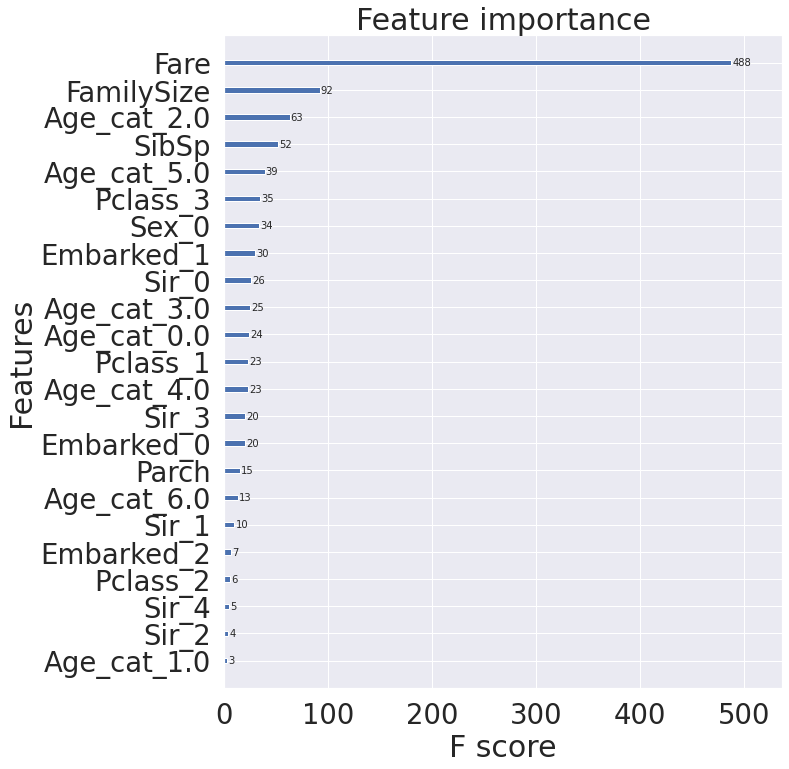

In [85]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 어떤 컬럼이 예측에 중요한지 점수 출력
plot_importance(gridcv.best_estimator_, ax=ax)

In [86]:
#X_test를 이용해서 생존 예측
pred = gridcv.predict(X_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
#오차 행렬을 구해서 출력
confusion = confusion_matrix( y_test, pred)
confusion


array([[99,  8],
       [19, 53]])

In [88]:
#정확도 출력
accuracy = accuracy_score(y_test , pred)
accuracy

0.8491620111731844

In [89]:
roc_auc_score(y_test, pred)

0.8306723779854621